# Using Machine Learning Tools: Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The scenario for this assignment is that you are a new employee of a company (that rents bikes, alongside other activities) and you have been assigned the task of predicting the bike rentals. Your line manager has given you some instructions (those shown below) but is expecting you to be able to do this task without close supervision and to report back with understandable and concise text, graphics and code (and of course the company wants a copy of all the code required to perform this task). Naturally, you are wanting to show that you are a valuable member of the company and although the company allows the use of ChatGPT, you will want to show that you are making useful contributions and that you bring value to the company beyond just being able to type instructions into ChatGPT, as otherwise the company might replace you with a cheaper data entry employee. Hence, you should use ChatGPT whenever you like (or whenever instructed to - see later) but do highlight how your own knowledge and judgement makes a contribution.

The main aims of this assignment are: 

- to practice using tools for loading and viewing data sets;
- to check data for common pitfalls and clean it up;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Some questions require writing code, some require graphical results, and some require short comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to be able to be run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant, including ChatGPT, although do not use someone else's code or answers that directly relate to these questions. If you take a large portion of code or text from the internet or ChatGPT then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [268]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

## Step 1: Loading and initial processing of the dataset (40%)

Download the data set `SeoulBikeData.csv` **from MyUni** using the link provided on the assignment page. 

The data is stored in a CSV (comma separated values) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in degrees Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: degrees Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

### 1.1 Load and visualise the data

**Load the data set from the csv file into a DataFrame, summarise it in text using one pandas function, and then visualise each feature with one type of plot (this can be different for each feature).**

In [269]:
### Your code here
# Read the CSV file and load the data into a DataFrame
seoul_bikerental = pd.read_csv('SeoulBikeData.csv')


# Generate a summary of statistics for the DataFrame
seoul_bikerental.describe()



,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,714.876027,11.500000,12.945765,58.268014,1.848950,1436.825799,4.073813
std,1160.468927,6.922582,12.376168,20.807845,10.665215,608.298712,13.060369
min,0.000000,0.000000,-17.800000,-2.200000,-0.700000,27.000000,-30.600000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000
75%,1066.000000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000
max,90997.000000,23.000000,195.000000,455.000000,991.100000,2000.000000,27.200000


In [270]:
# Display the first few rows of the DataFrame
seoul_bikerental.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes


In [271]:
# Print a concise summary of the DataFrame
seoul_bikerental.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   float64
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   object 
 9   Rainfall(mm)               8760 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Since some data are numeric variables, but are subtyped here, these data types are handled afterwards

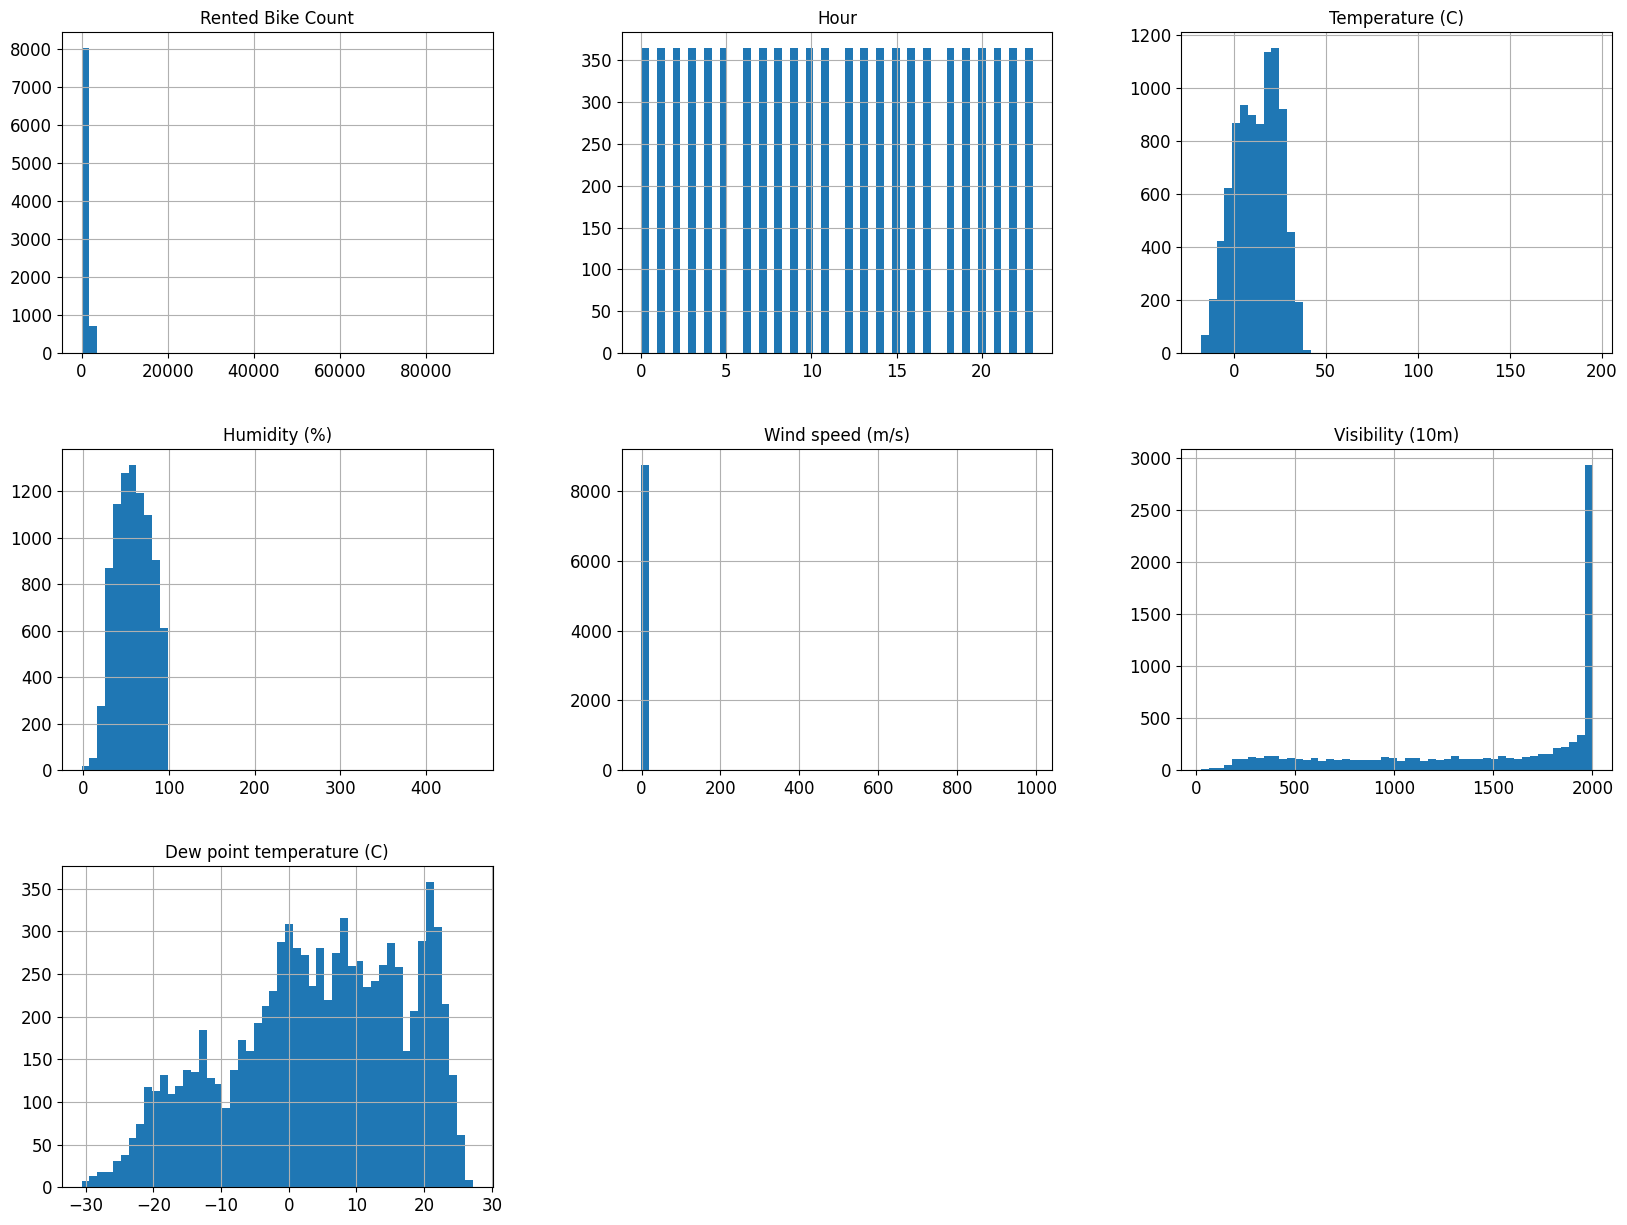

In [272]:
seoul_bikerental.hist(bins=50, figsize=(20,15))
plt.show() 


### 1.2 Cleaning the data

Do the following to the data:
 - Using the "Functioning day" feature, **remove rows from the DataFrame** where the business is closed and then **delete the Functioning Day feature from the DataFrame**.
 - **Convert seasons to a one hot encoded format** (1 binary feature for each of the 4 seasons).
 - Replace the **Date** feature with a binary **Weekday** feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
 - **Convert remaining non-numerical features to a numerical format** or replace with NaN (i.e. `np.nan`) where not possible.
 - **Identify and fix any outliers and errors in the data**.

Save the result as a new csv file called `CleanedSeoulBikeData.csv` and **upload this** to MyUni along with this notebook when you submit your assignment.

In [273]:
## Example code for weekday feature mapping ##

import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

In [274]:
print(seoul_bikerental.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature (C)', 'Humidity (%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [275]:
### Your code here (and remember to upload the resulting csv)
# Remove rows where the business is closed and drop the Functioning Day feature
seoul_bikerental = seoul_bikerental[seoul_bikerental['Functioning Day'] == 'Yes']
seoul_bikerental.drop(['Functioning Day'], axis=1, inplace=True)

# Convert seasons to one-hot encoded format
seoul_bikerental = pd.get_dummies(seoul_bikerental, columns=['Seasons'])


# Replace Date feature with a binary Weekday feature
seoul_bikerental['Weekday'] = seoul_bikerental['Date'].apply(date_is_weekday)
seoul_bikerental.drop(['Date'], axis=1, inplace=True)

# Convert remaining non-numerical features to numerical format or replace with NaN
seoul_bikerental['Holiday'] = seoul_bikerental['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)
seoul_bikerental['Solar Radiation (MJ/m2)'] = pd.to_numeric(seoul_bikerental['Solar Radiation (MJ/m2)'], errors='coerce')
seoul_bikerental['Rainfall(mm)'] = pd.to_numeric(seoul_bikerental['Rainfall(mm)'], errors='coerce')
seoul_bikerental['Snowfall (cm)'] = pd.to_numeric(seoul_bikerental['Snowfall (cm)'], errors='coerce')

# Check for outliers and errors in the data
numeric_features = seoul_bikerental.select_dtypes(include=[np.number]).columns
for feature in numeric_features:
    seoul_bikerental[feature] = pd.to_numeric(seoul_bikerental[feature], errors='coerce')
    seoul_bikerental[feature] = seoul_bikerental[feature].fillna(seoul_bikerental[feature].median())

# Save the cleaned data
cleaned_file_path = r'C:\Users\yanxinda\Desktop\using ml tools\assignment1\seoul_bikerental_cleaned.csv'
seoul_bikerental.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")



Cleaned data saved to C:\Users\yanxinda\Desktop\using ml tools\assignment1\seoul_bikerental_cleaned.csv


In [276]:
# Load the cleaned data
cleaned_file_path = 'seoul_bikerental_cleaned.csv'
seoul_bikerental_cleaned = pd.read_csv(cleaned_file_path)

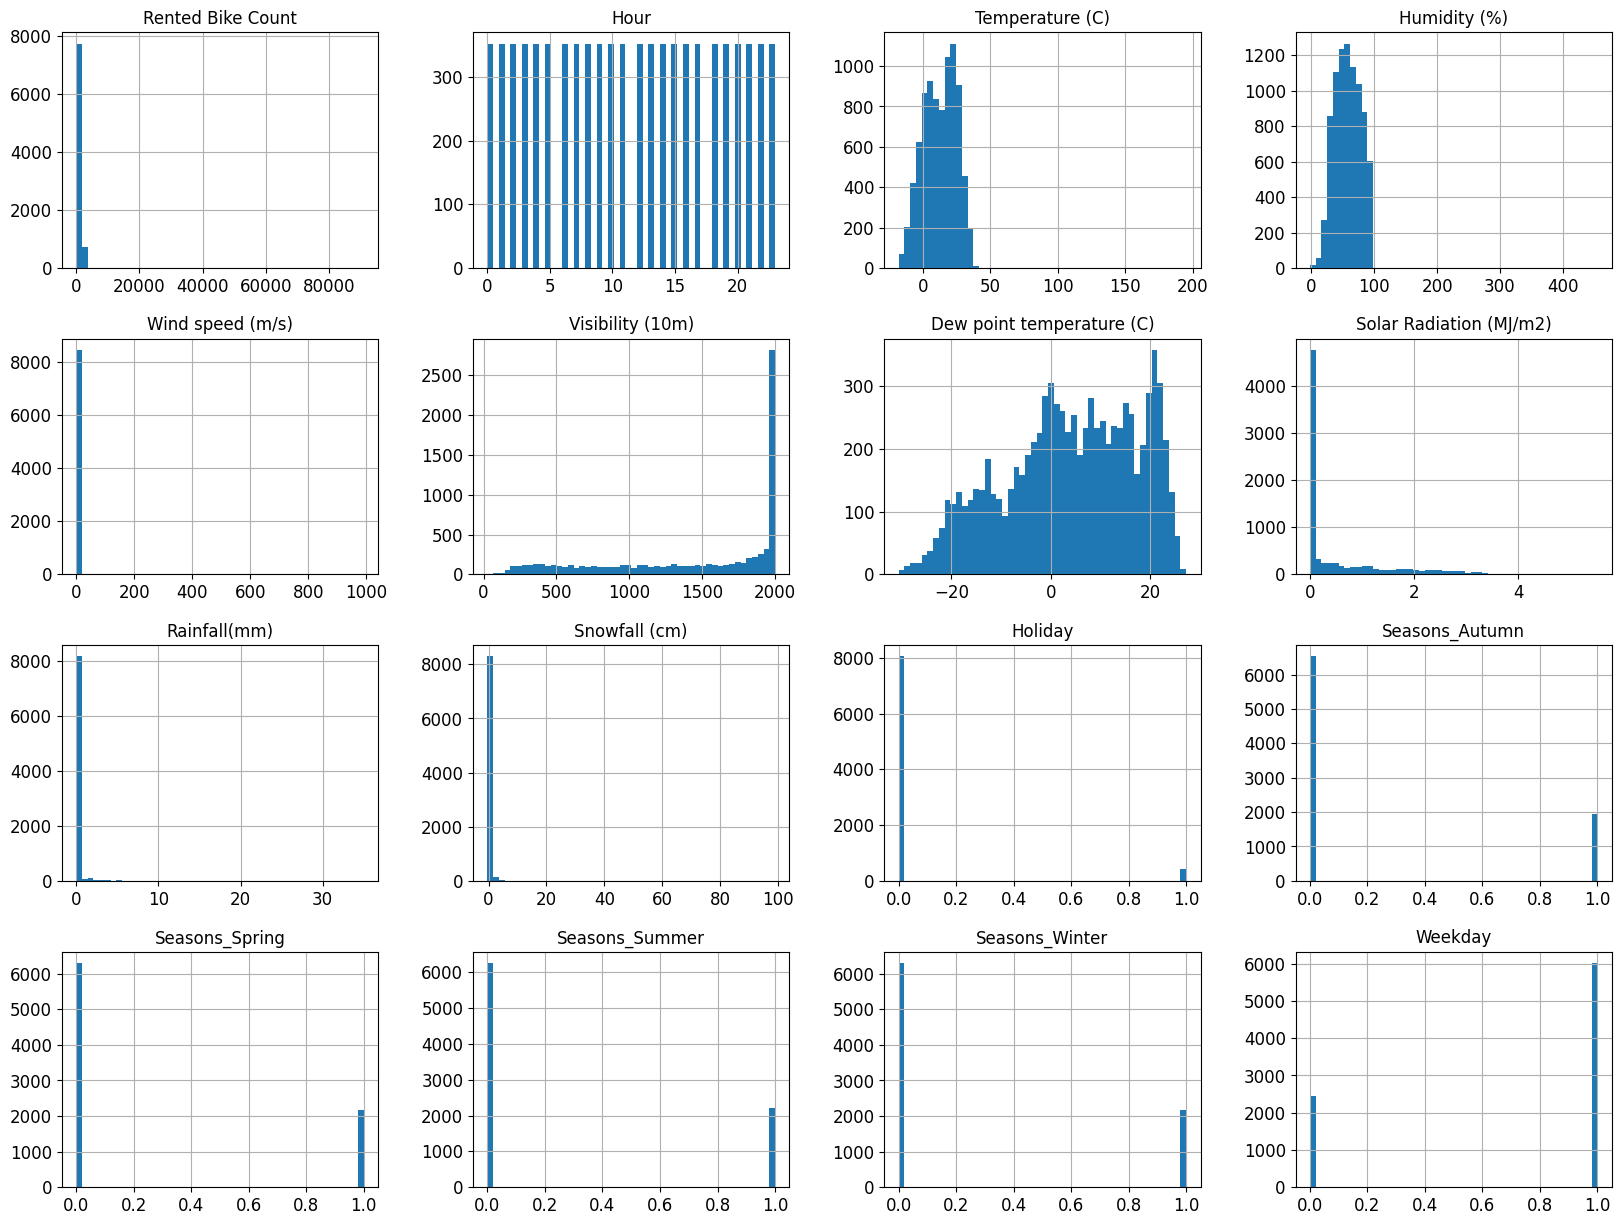

In [277]:
# Generate histograms for all numeric features
seoul_bikerental_cleaned.hist(bins=50, figsize=(20, 15))
plt.show()

In [278]:
seoul_bikerental_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   int64  
 2   Temperature (C)            8465 non-null   float64
 3   Humidity (%)               8465 non-null   float64
 4   Wind speed (m/s)           8465 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature (C)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)    8465 non-null   float64
 8   Rainfall(mm)               8465 non-null   float64
 9   Snowfall (cm)              8465 non-null   float64
 10  Holiday                    8465 non-null   int64  
 11  Seasons_Autumn             8465 non-null   int64  
 12  Seasons_Spring             8465 non-null   int64  
 13  Seasons_Summer             8465 non-null   int64

Based on the description of the data and common data processing experience, the following variables should be considered as categorical variables:

Holiday: This variable indicates whether it is a holiday, typically a binary classification (Holiday/No holiday).
Weekday: This variable indicates whether it is a weekday, also a binary classification (Weekday/Weekend).
Seasons_Winter, Seasons_Spring, Seasons_Summer, Seasons_Autumn: These variables are derived from the original "Seasons" column and are represented as one-hot encoded variables, with each being a binary classification (0 or 1).

In [279]:
# Convert numerical variables to categorical
seoul_bikerental_cleaned['Holiday'] = seoul_bikerental_cleaned['Holiday'].astype('category')
seoul_bikerental_cleaned['Weekday'] = seoul_bikerental_cleaned['Weekday'].astype('category')
seoul_bikerental_cleaned['Seasons_Winter'] = seoul_bikerental_cleaned['Seasons_Winter'].astype('category')
seoul_bikerental_cleaned['Seasons_Spring'] = seoul_bikerental_cleaned['Seasons_Spring'].astype('category')
seoul_bikerental_cleaned['Seasons_Summer'] = seoul_bikerental_cleaned['Seasons_Summer'].astype('category')
seoul_bikerental_cleaned['Seasons_Autumn'] = seoul_bikerental_cleaned['Seasons_Autumn'].astype('category')

# Check the data types to ensure they were converted correctly
print(seoul_bikerental_cleaned.dtypes)


Rented Bike Count               int64
Hour                            int64
Temperature (C)               float64
Humidity (%)                  float64
Wind speed (m/s)              float64
Visibility (10m)                int64
Dew point temperature (C)     float64
Solar Radiation (MJ/m2)       float64
Rainfall(mm)                  float64
Snowfall (cm)                 float64
Holiday                      category
Seasons_Autumn               category
Seasons_Spring               category
Seasons_Summer               category
Seasons_Winter               category
Weekday                      category
dtype: object


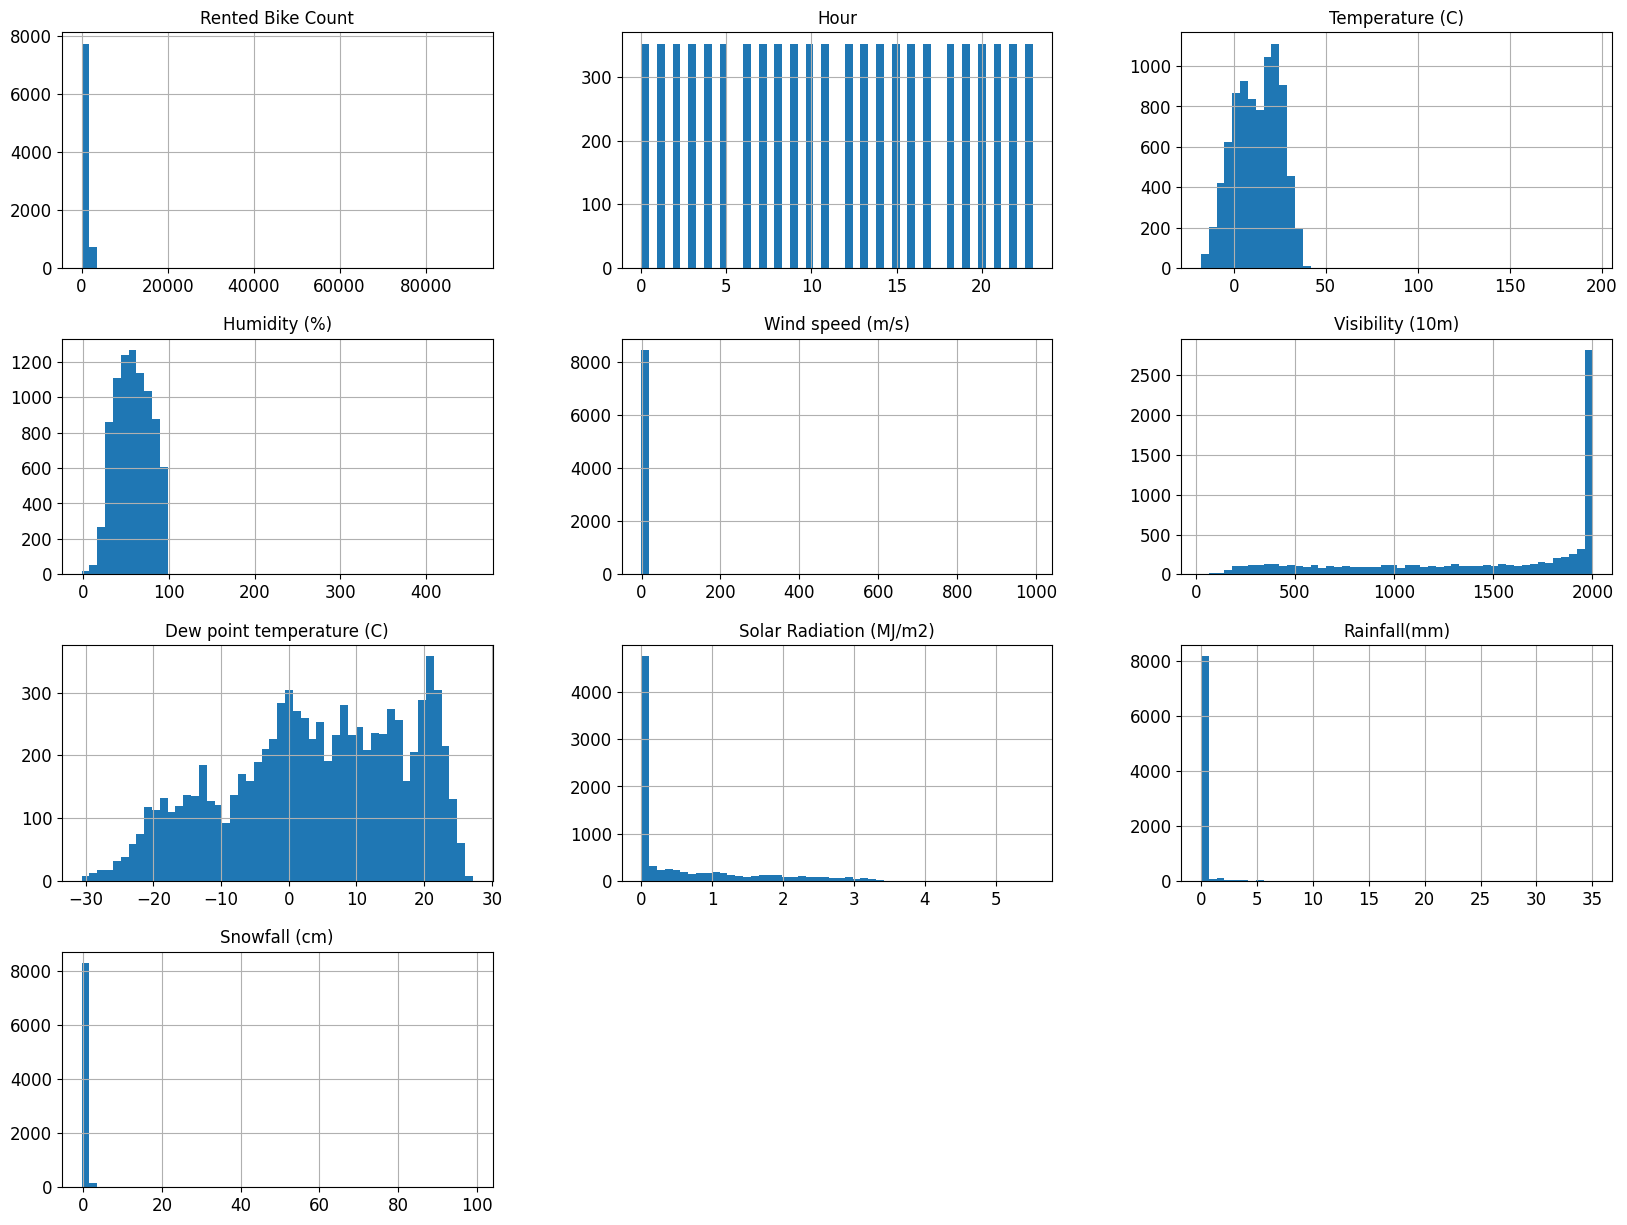

In [280]:
# Generate histograms for all numeric features
seoul_bikerental_cleaned.hist(bins=50, figsize=(20, 15))
plt.show()


As you can see from the image, there are still a lot of OUTLIers for many of the variables, which we fix in a later section.

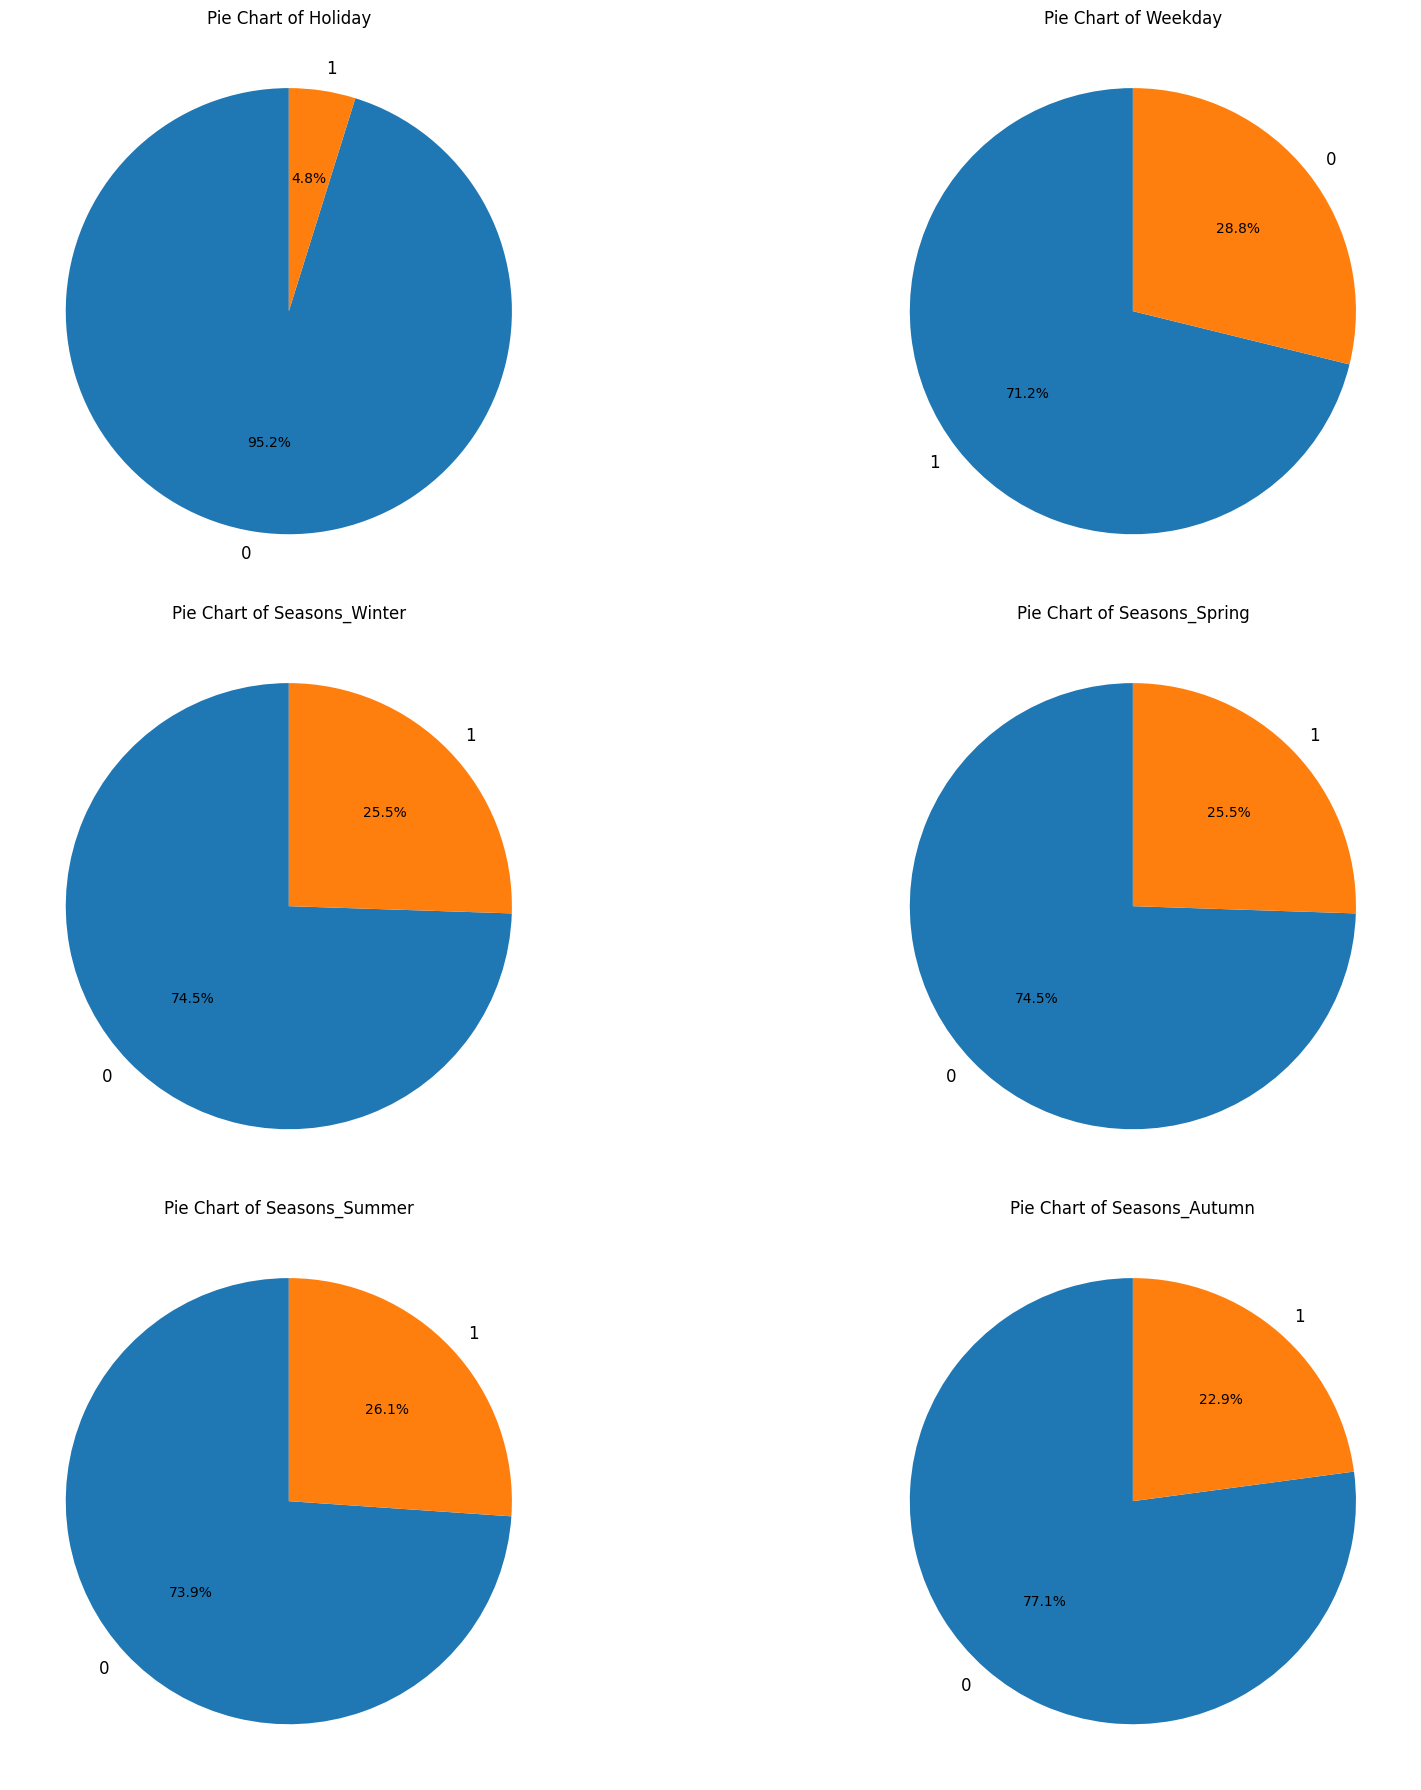

In [281]:
# Visualize categorical features
categorical_features = ['Holiday', 'Weekday', 'Seasons_Winter', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Autumn']
n_cols = 2
n_rows = len(categorical_features) // n_cols + (len(categorical_features) % n_cols > 0)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))

for i, feature in enumerate(categorical_features):
    ax = axes[i // n_cols, i % n_cols]
    seoul_bikerental_cleaned[feature].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_ylabel('')
    ax.set_title(f'Pie Chart of {feature}')

# Remove empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


For the variables Rainfall (mm), Snowfall (cm) and Solar Radiation (MJ/m2), we excluded 0 values from the data before calculating the IQR (interquartile range). This is because an excessive number of 0 values can have an unreasonable effect on the calculation of the interquartile range and IQR. By excluding 0 values, we can more accurately calculate the interquartile range and IQR for these variables, and thus identify and deal with outliers more effectively.

In [282]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ~df[column].between(lower_bound, upper_bound)

# Separate treatment of numeric and catagorical variables
numeric_features = seoul_bikerental_cleaned.select_dtypes(include=[np.number]).columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature (C)', 'Humidity (%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [283]:
# Process all numerical variables using IQR, excluding Rainfall(mm) and Snowfall(cm) and Solar Radiation (MJ/m2)
for column in numeric_features:
    if column not in ['Rainfall(mm)', 'Snowfall (cm)','Solar Radiation (MJ/m2)']:
        outliers = detect_outliers_iqr(seoul_bikerental_cleaned, column)
        seoul_bikerental_cleaned.loc[outliers, column] = np.nan



In [284]:




for column in ['Rainfall(mm)', 'Snowfall (cm)', 'Solar Radiation (MJ/m2)']:
    # Exclude zero values
    df_nonzero = seoul_bikerental_cleaned[seoul_bikerental_cleaned[column] != 0].copy()
    
    # Detect outliers
    outliers = detect_outliers_iqr(df_nonzero, column)
    
    # Set outliers to NaN
    df_nonzero.loc[outliers, column] = np.nan
    
    # Update the original DataFrame
    seoul_bikerental_cleaned.loc[df_nonzero.index, column] = df_nonzero[column]



In [285]:
cleaned_file_path_iqr = r'C:\Users\yanxinda\Desktop\using ml tools\assignment1\seoul_bikerental_cleaned.csv'
seoul_bikerental_cleaned.to_csv(cleaned_file_path_iqr, index=False)
print(f"Cleaned data saved to {cleaned_file_path_iqr}")

Cleaned data saved to C:\Users\yanxinda\Desktop\using ml tools\assignment1\seoul_bikerental_cleaned.csv


In [286]:
# Load the cleaned data
cleaned_file_path = 'seoul_bikerental_cleaned.csv'
# When reloading data, Pandas does not automatically recognise certain columns as categorical data types by default. To ensure that categorical variables are handled correctly when reloading data, you can explicitly specify the type of these columns.
seoul_bikerental_cleaned = pd.read_csv(cleaned_file_path, dtype={
    'Holiday': 'category',
    'Weekday': 'category',
    'Seasons_Winter': 'category',
    'Seasons_Spring': 'category',
    'Seasons_Summer': 'category',
    'Seasons_Autumn': 'category'
})

In [287]:
print(seoul_bikerental_cleaned.dtypes)

Rented Bike Count             float64
Hour                          float64
Temperature (C)               float64
Humidity (%)                  float64
Wind speed (m/s)              float64
Visibility (10m)              float64
Dew point temperature (C)     float64
Solar Radiation (MJ/m2)       float64
Rainfall(mm)                  float64
Snowfall (cm)                 float64
Holiday                      category
Seasons_Autumn               category
Seasons_Spring               category
Seasons_Summer               category
Seasons_Winter               category
Weekday                      category
dtype: object


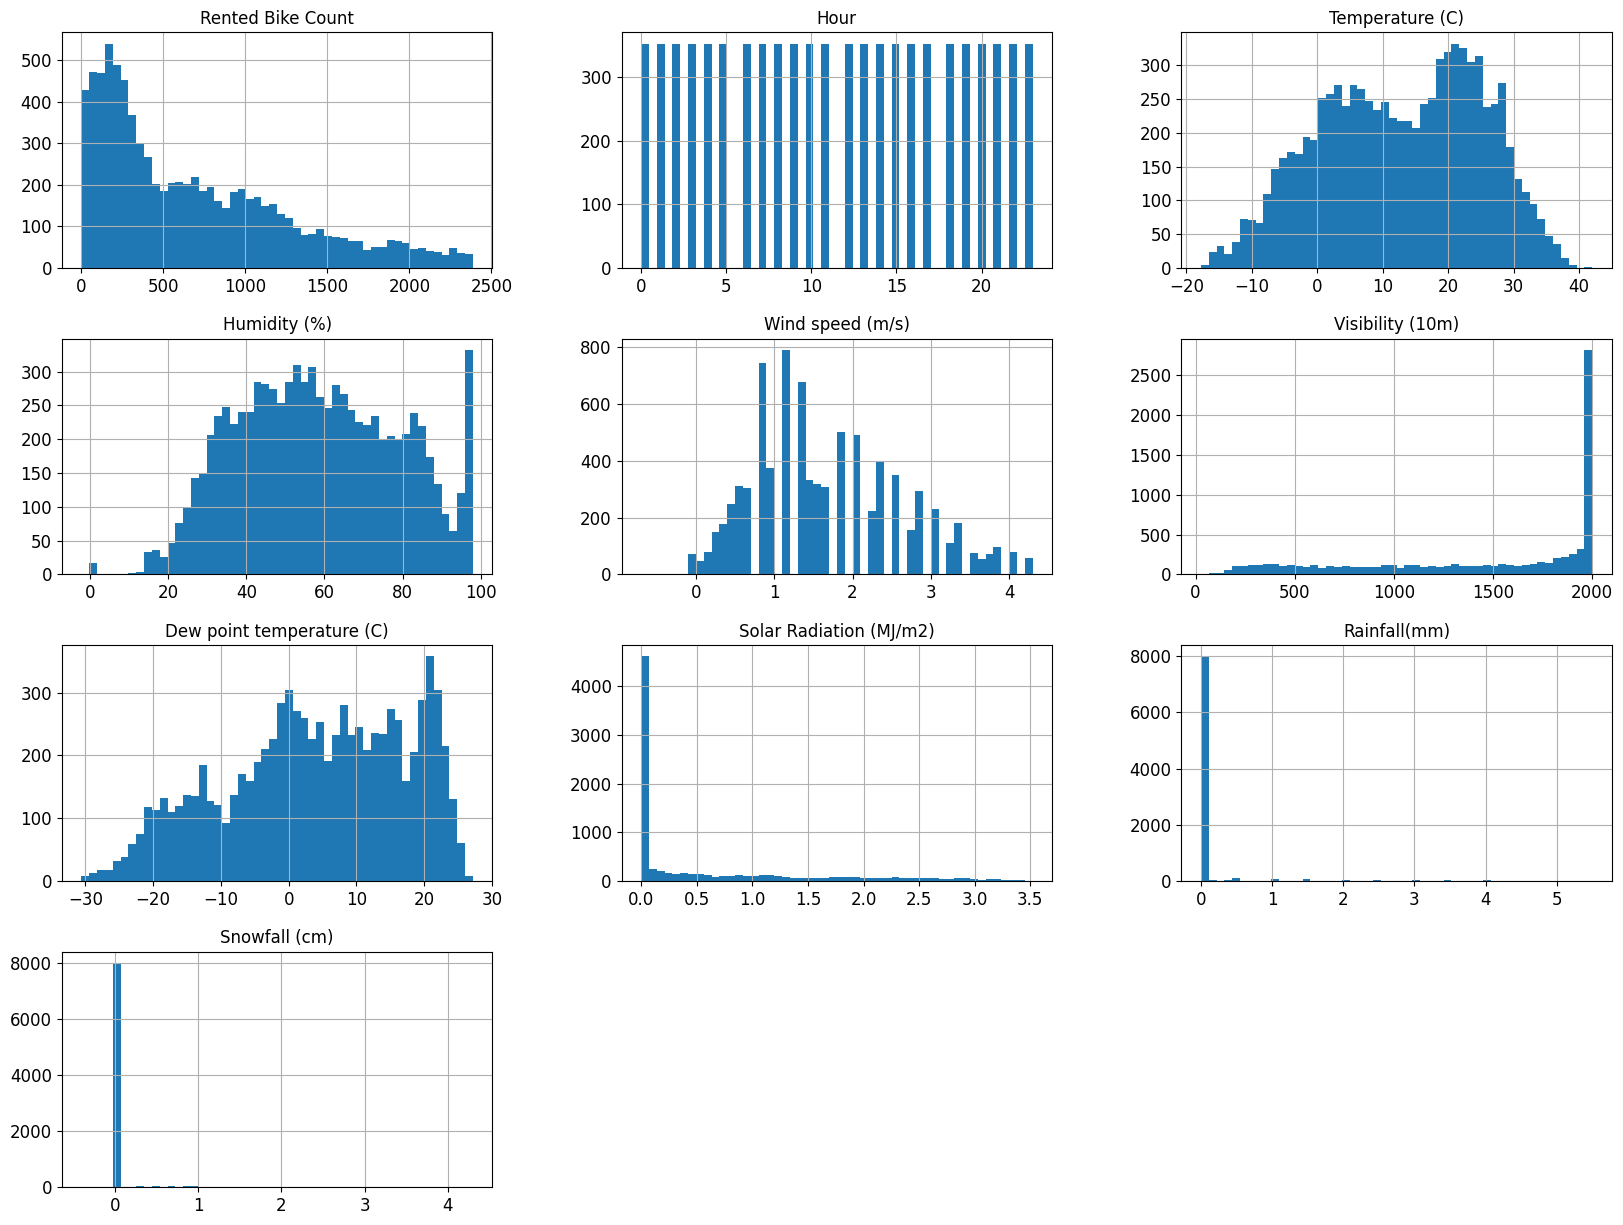

In [288]:
# Generate histograms of numerical features
seoul_bikerental_cleaned[numeric_features].hist(bins=50, figsize=(20, 15))
plt.show()

In [289]:
seoul_bikerental_cleaned.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8312.000000,8465.000000,8462.000000,8464.000000,8308.000000,8465.000000,8465.000000,8464.000000,8410.000000,8454.000000
mean,692.875000,11.507029,12.774226,58.143526,1.667104,1433.873479,3.944997,0.567120,0.075279,0.070310
std,587.661853,6.920899,12.109102,20.495299,0.946193,609.051229,13.242399,0.867182,0.436215,0.386992
min,2.000000,0.000000,-17.800000,-2.200000,-0.700000,27.000000,-30.600000,0.000000,0.000000,-0.400000
25%,211.000000,6.000000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.000000,0.000000
50%,522.000000,12.000000,13.500000,57.000000,1.500000,1690.000000,4.700000,0.010000,0.000000,0.000000
75%,1054.000000,18.000000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.000000,0.000000
max,2387.000000,23.000000,42.000000,98.000000,4.300000,2000.000000,27.200000,3.520000,5.500000,4.300000


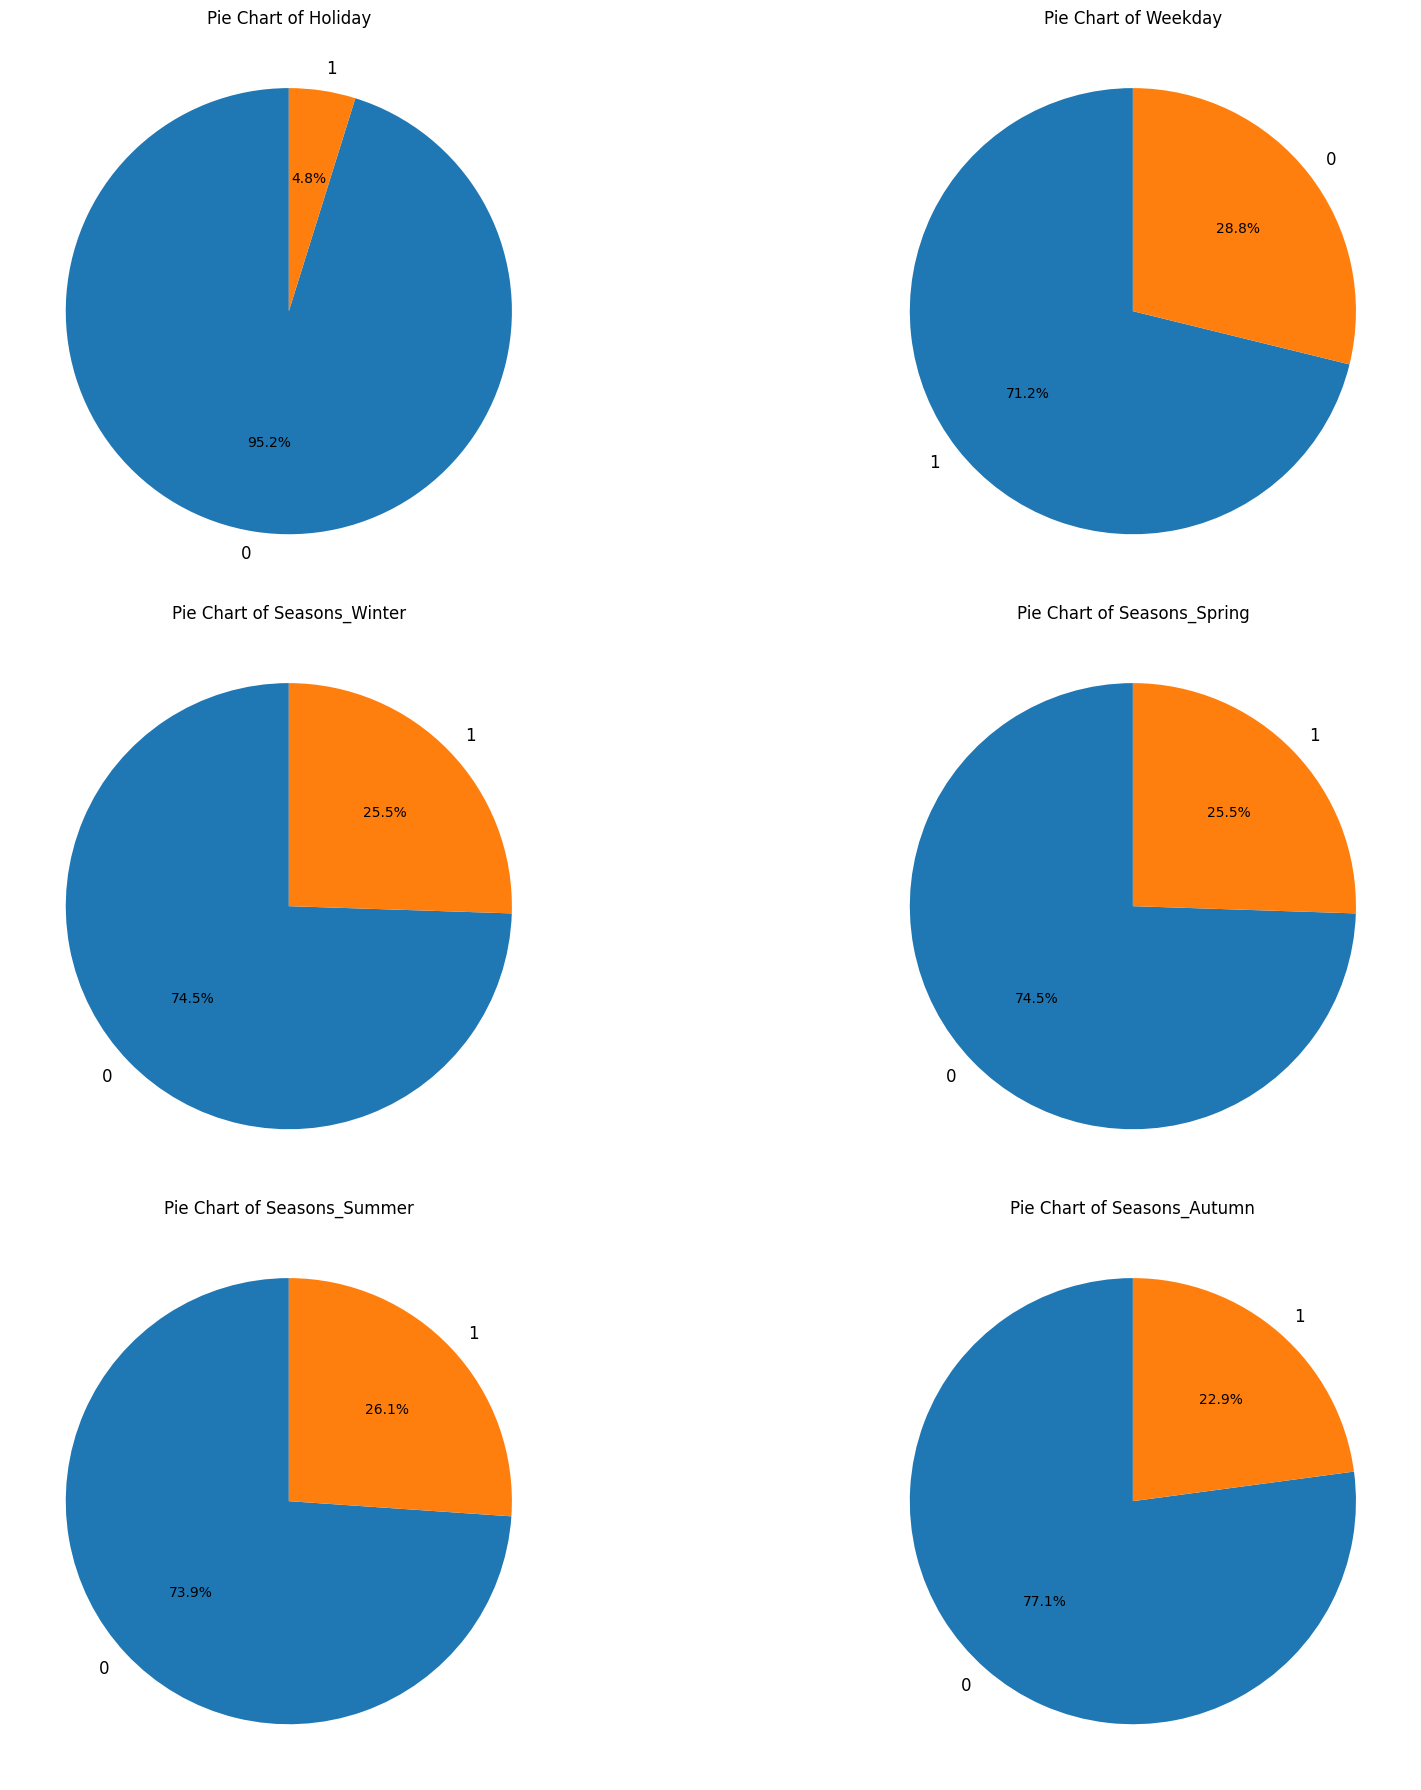

In [290]:
# Generate pie charts of categorical features
if len(categorical_features) > 0:
    n_cols = 2
    n_rows = len(categorical_features) // n_cols + (len(categorical_features) % n_cols > 0)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))

    for i, feature in enumerate(categorical_features):
        ax = axes[i // n_cols, i % n_cols]
        seoul_bikerental_cleaned[feature].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
        ax.set_ylabel('')
        ax.set_title(f'Pie Chart of {feature}')

    # Remove empty subgraphs
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axes.flatten()[j])

    plt.tight_layout()
    plt.show()

In [291]:
seoul_bikerental_cleaned.isnull().sum()

Rented Bike Count            153
Hour                           0
Temperature (C)                3
Humidity (%)                   1
Wind speed (m/s)             157
Visibility (10m)               0
Dew point temperature (C)      0
Solar Radiation (MJ/m2)        1
Rainfall(mm)                  55
Snowfall (cm)                 11
Holiday                        0
Seasons_Autumn                 0
Seasons_Spring                 0
Seasons_Summer                 0
Seasons_Winter                 0
Weekday                        0
dtype: int64

## Step 2: Pre-process the data and perform the first fit (20%)

### 2.1 Imputation and Pre-Processing

Make sure that you have set any problematic values in the numerical data to `np.nan` and then write code for a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* do any other pre-processing** that you think should be used.

In [292]:
### Your code here
# Select numerical features
numeric_features = seoul_bikerental_cleaned.select_dtypes(include=[np.number]).columns
# Create a Pipeline for preprocessing numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Apply the preprocessing Pipeline to numerical features
seoul_bikerental_cleaned[numeric_features] = numeric_transformer.fit_transform(seoul_bikerental_cleaned[numeric_features])

# View the preprocessed data
print(seoul_bikerental_cleaned.head())




   Rented Bike Count      Hour  Temperature (C)  Humidity (%)  \
0          -0.747828 -1.662748        -1.484728     -1.031743   
1          -0.833630 -1.518249        -1.509508     -0.982946   
2          -0.886827 -1.373751        -1.550809     -0.934148   
3          -1.000086 -1.229252        -1.567330     -0.885351   
4          -1.049851 -1.084754        -1.550809     -1.080541   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature (C)  \
0          0.571672          0.929577                  -1.627067   
1         -0.921515          0.929577                  -1.627067   
2         -0.708202          0.929577                  -1.634619   
3         -0.814858          0.929577                  -1.627067   
4          0.678328          0.929577                  -1.702586   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Holiday  \
0                -0.653965     -0.172006      -0.181572       0   
1                -0.653965     -0.172006      -0.181572       0   

In [293]:
print(seoul_bikerental_cleaned.head())

   Rented Bike Count      Hour  Temperature (C)  Humidity (%)  \
0          -0.747828 -1.662748        -1.484728     -1.031743   
1          -0.833630 -1.518249        -1.509508     -0.982946   
2          -0.886827 -1.373751        -1.550809     -0.934148   
3          -1.000086 -1.229252        -1.567330     -0.885351   
4          -1.049851 -1.084754        -1.550809     -1.080541   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature (C)  \
0          0.571672          0.929577                  -1.627067   
1         -0.921515          0.929577                  -1.627067   
2         -0.708202          0.929577                  -1.634619   
3         -0.814858          0.929577                  -1.627067   
4          0.678328          0.929577                  -1.702586   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Holiday  \
0                -0.653965     -0.172006      -0.181572       0   
1                -0.653965     -0.172006      -0.181572       0   

In [294]:
seoul_bikerental_cleaned.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature (C)              0
Humidity (%)                 0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature (C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Holiday                      0
Seasons_Autumn               0
Seasons_Spring               0
Seasons_Summer               0
Seasons_Winter               0
Weekday                      0
dtype: int64

### 2.2 Predicting bike rentals

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (RMSE) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Using the pipeline** you wrote above, pre-process and fit a ***linear regression* model** to the data in an appropriate way. After this, **calculate and print the RMSE of the fit to the training data**. 

To act as a simple baseline for comparison purposes, **also calculate and print the RMSE** that you would get if _all_ the predictions were set to be the **mean of the training targets** (i.e. bike rentals).

In [295]:
### Your code and outputs here

# Select numerical features
numeric_features = seoul_bikerental_cleaned.select_dtypes(include=[np.number]).columns
# Define the target variable
target = 'Rented Bike Count'
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(seoul_bikerental_cleaned[numeric_features].drop(columns=[target]),
                                                    seoul_bikerental_cleaned[target],
                                                    test_size=0.2,
                                                    random_state=42)
# Create and train the linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
# Predict the training data
y_train_pred = linear_regressor.predict(X_train)
# Calculate the RMSE for the training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"Training RMSE: {rmse_train}")
# Generate baseline predictions using the mean of the training targets
baseline_pred = np.full_like(y_train, y_train.mean())
# Calculate the RMSE for the baseline predictions
rmse_baseline = np.sqrt(mean_squared_error(y_train, baseline_pred))
print(f"Baseline RMSE: {rmse_baseline}")
# Predict the testing data
y_test_pred = linear_regressor.predict(X_test)
# Calculate the RMSE for the testing data
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test RMSE: {rmse_test}")


Training RMSE: 0.7200462038949076
Baseline RMSE: 1.0034303208619888
Test RMSE: 0.6950887285304496


In [296]:
# Extract coefficients and intercept
coefficients = linear_regressor.coef_
intercept = linear_regressor.intercept_

# Print coefficients and intercept
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Pair coefficients with corresponding feature names
feature_names = X_train.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
print(coefficients_df)



Intercept: 0.004528408991452712
Coefficients: [ 0.29453286  0.38576657 -0.27060387  0.00086429  0.02927698  0.2188993
 -0.04132419 -0.13751469 -0.00103993]
                     Feature  Coefficient
0                       Hour     0.294533
1            Temperature (C)     0.385767
2               Humidity (%)    -0.270604
3           Wind speed (m/s)     0.000864
4           Visibility (10m)     0.029277
5  Dew point temperature (C)     0.218899
6    Solar Radiation (MJ/m2)    -0.041324
7               Rainfall(mm)    -0.137515
8              Snowfall (cm)    -0.001040


## Step 3: Hyper-parameter optimisation (30%)

**Use ChatGPT** (along with any modifications that you require) to create and run code (using sklearn pipelines) that will do the following:
 - fit a **linear regression** and a **Support Vector Regression** method to the data using **10-fold cross validation** for each model
 - display the **mean and standard deviation** of the **RMSE values** for each model (at baseline) in the _appropriate datasets_
 - perform a **hyper-parameter optimisation** on each model using **GridSearch**
 - display the **mean and standard deviation** of the **RMSE values** for each model (after optimisation) in the _appropriate datasets_
 - choose the **best model** and **visualise the results** with a single graphic of your choice

**Display the ChatGPT prompt** and the **code**, _including any fixes_ that you needed to make to get the code to work, along with the **outputs** obtained by running the code.


### Your ChatGPT prompt

Create a Python script using sklearn pipelines that will do the following:
1. Fit a linear regression and a Support Vector Regression (SVR) method to a given dataset using 10-fold cross-validation for each model.
2. Display the mean and standard deviation of the RMSE values for each model at baseline in the appropriate datasets.
3. Perform a hyper-parameter optimization on each model using GridSearch.
4. Display the mean and standard deviation of the RMSE values for each model after optimization in the appropriate datasets.
5. Choose the best model and visualize the results with a single graphic of your choice.



Linear Regression Baseline RMSE: 0.717 ± 0.021
SVR Baseline RMSE: 0.583 ± 0.032
Best Linear Regression RMSE: 0.717 ± 0.021
Best SVR RMSE: 0.560 ± 0.031
Best Model: SVR


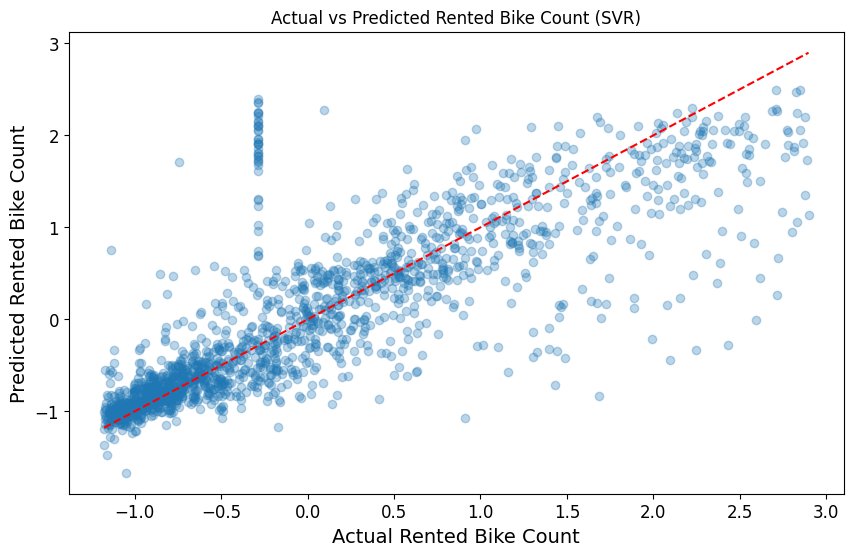

In [300]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(seoul_bikerental_cleaned[numeric_features].drop(columns=[target]),
                                                    seoul_bikerental_cleaned[target],
                                                    test_size=0.2,
                                                    random_state=32)

# Define pipelines for linear regression and SVR
pipeline_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

pipeline_svr = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Define cross-validation strategy
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Fit and evaluate linear regression model using cross-validation
cv_scores_lr = cross_val_score(pipeline_lr, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
rmse_scores_lr = np.sqrt(-cv_scores_lr)
mean_rmse_lr = rmse_scores_lr.mean()
std_rmse_lr = rmse_scores_lr.std()

# Fit and evaluate SVR model using cross-validation
cv_scores_svr = cross_val_score(pipeline_svr, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
rmse_scores_svr = np.sqrt(-cv_scores_svr)
mean_rmse_svr = rmse_scores_svr.mean()
std_rmse_svr = rmse_scores_svr.std()

# Print baseline RMSE values
print(f"Linear Regression Baseline RMSE: {mean_rmse_lr:.3f} ± {std_rmse_lr:.3f}")
print(f"SVR Baseline RMSE: {mean_rmse_svr:.3f} ± {std_rmse_svr:.3f}")

# Hyper-parameter optimization for linear regression
param_grid_lr = {
    'lr__fit_intercept': [True, False]
}

# Limit parallel jobs to 1 to reduce memory usage
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=kf, scoring='neg_mean_squared_error', n_jobs=1)
grid_search_lr.fit(X_train, y_train)
best_lr = grid_search_lr.best_estimator_
best_params_lr = grid_search_lr.best_params_

# Hyper-parameter optimization for SVR
param_grid_svr = {
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__C': [0.1, 1, 10],
    'svr__gamma': ['scale', 'auto']
}

# Limit parallel jobs to 1 to reduce memory usage
grid_search_svr = GridSearchCV(pipeline_svr, param_grid_svr, cv=kf, scoring='neg_mean_squared_error', n_jobs=1)
grid_search_svr.fit(X_train, y_train)
best_svr = grid_search_svr.best_estimator_
best_params_svr = grid_search_svr.best_params_

# Evaluate the best models after hyper-parameter optimization
cv_scores_best_lr = cross_val_score(best_lr, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
rmse_scores_best_lr = np.sqrt(-cv_scores_best_lr)
mean_rmse_best_lr = rmse_scores_best_lr.mean()
std_rmse_best_lr = rmse_scores_best_lr.std()

cv_scores_best_svr = cross_val_score(best_svr, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
rmse_scores_best_svr = np.sqrt(-cv_scores_best_svr)
mean_rmse_best_svr = rmse_scores_best_svr.mean()
std_rmse_best_svr = rmse_scores_best_svr.std()

# Print RMSE values after hyper-parameter optimization
print(f"Best Linear Regression RMSE: {mean_rmse_best_lr:.3f} ± {std_rmse_best_lr:.3f}")
print(f"Best SVR RMSE: {mean_rmse_best_svr:.3f} ± {std_rmse_best_svr:.3f}")

# Choose the best model
best_model = best_lr if mean_rmse_best_lr < mean_rmse_best_svr else best_svr
print(f"Best Model: {'Linear Regression' if best_model == best_lr else 'SVR'}")

# Visualize the results
y_test_pred = best_model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title(f'Actual vs Predicted Rented Bike Count ({ "Linear Regression" if best_model == best_lr else "SVR"})')
plt.show()

In [301]:
# Print best parameters for SVR
print("Best parameters for SVR:")
print(best_params_svr)


Best parameters for SVR:
{'svr__C': 10, 'svr__gamma': 'auto', 'svr__kernel': 'rbf'}


In [302]:
# Save the cleaned data
cleaned_file_path = r'C:\Users\yanxinda\Desktop\using ml tools\assignment1\seoul_bikerental_cleaned.csv'
seoul_bikerental.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")

Cleaned data saved to C:\Users\yanxinda\Desktop\using ml tools\assignment1\seoul_bikerental_cleaned.csv


## Step 4: Further improvements (10%)

Consider the code that you obtained from ChatGPT above and find one error, or one thing that could be improved, or one reasonable alternative (even if it might not necessarily lead to an improvement).  **Describe this error/improvement/alternative in the box below.**

### Your answer here (maximum of 200 words)

We can make an important improvement to the code by avoiding the redundant imputation and standardization of numerical features. Initially, we imputed and standardized the entire dataset before splitting it into training and testing sets. However, in subsequent steps, we included imputation and standardization again in the pipelines for both the linear regression and SVR models. This redundancy not only adds unnecessary computational overhead but could also lead to inconsistencies due to repeated transformations.

To enhance this, we can remove the imputation and standardization steps from the model pipelines, as these steps have already been applied to the dataset. This ensures consistency and efficiency in data transformation.

By addressing this issue, the model training and evaluation process becomes more streamlined, avoiding potential problems arising from redundant data transformations. This optimization makes our machine learning pipeline more efficient and reliable.

# Define pipelines for linear regression and SVR without imputation and standardization
pipeline_lr = Pipeline([
    ('lr', LinearRegression())
])

pipeline_svr = Pipeline([
    ('svr', SVR())
])


This change ensures that preprocessing steps are only performed once, and the models are trained on preprocessed data, improving overall efficiency and consistency.


Even if there is an extra step of filling missing values and standardizing the data, the impact on the data will not be significant. This is mainly because:

1.If missing values have already been filled with the median during the initial processing, performing the same filling operation again will not change the data since the missing values have already been filled.

2.If the data has already been standardized, standardizing it again will not alter the distribution of the data. Standardization scales the data to the same range (usually with a mean of 0 and a standard deviation of 1). Standardizing the same data again will not change its distribution characteristics.